In [1]:
!pip install layoutparser

In [2]:
!pip install layoutparser torchvision && pip install "detectron2@git+https://github.com/facebookresearch/detectron2.git@v0.5#egg=detectron2"

  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.5) to /tmp/pip-install-gm087rey/detectron2_550e591879734b9ba56e738211cdec9e
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-install-gm087rey/detectron2_550e591879734b9ba56e738211cdec9e
  Running command git checkout -q 82a57ce0b70057685962b352535147d9a8118578


In [3]:
!pip install layoutparser[ocr]

In [4]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

path_file_image = "data/resumes/temp/images_resumes_105.pdf/1_105.jpeg"

image = cv2.imread(path_file_image)
image = image[..., ::-1]

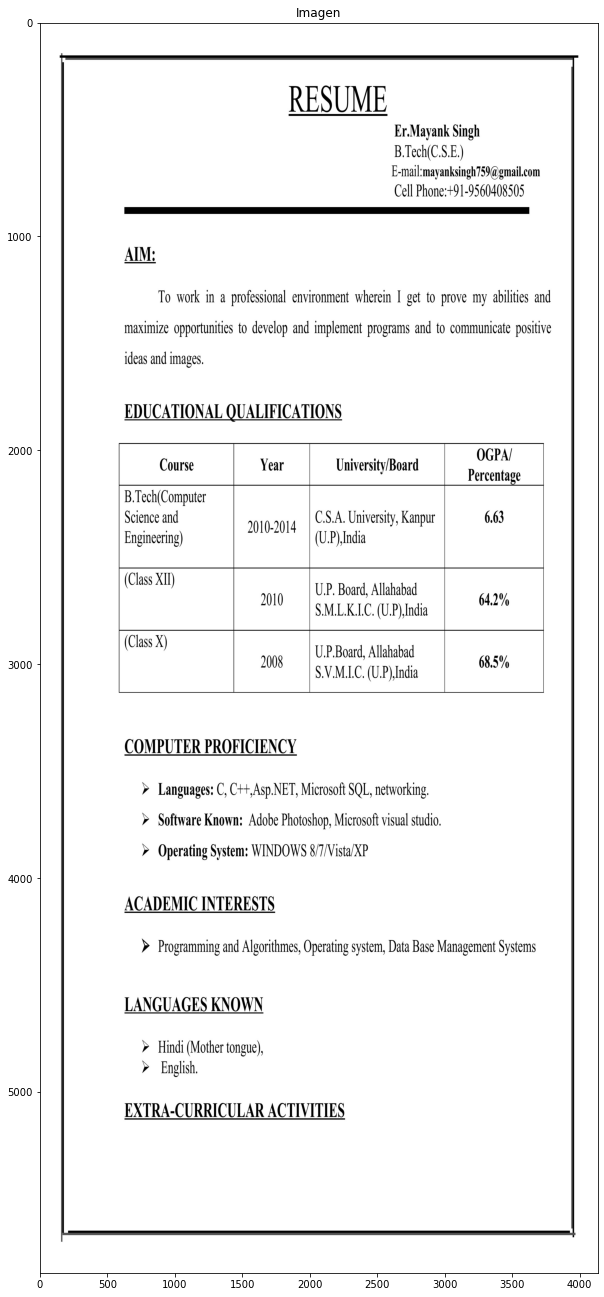

In [5]:
fig = plt.figure()
fig.set_size_inches(10,23)
plt.title('Imagen')
plt.imshow(image, cmap='gray', aspect='auto') 
plt.show()

The checkpoint state_dict contains keys that are not used by the model:
  pixel_mean
  pixel_std
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
/home/kguttas/anaconda3/envs/practica/lib/python3.7/site-packages/detectron2/structures/image_list.py:99: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/home/kguttas/anaconda3/envs/practica/lib/python3.7/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensor

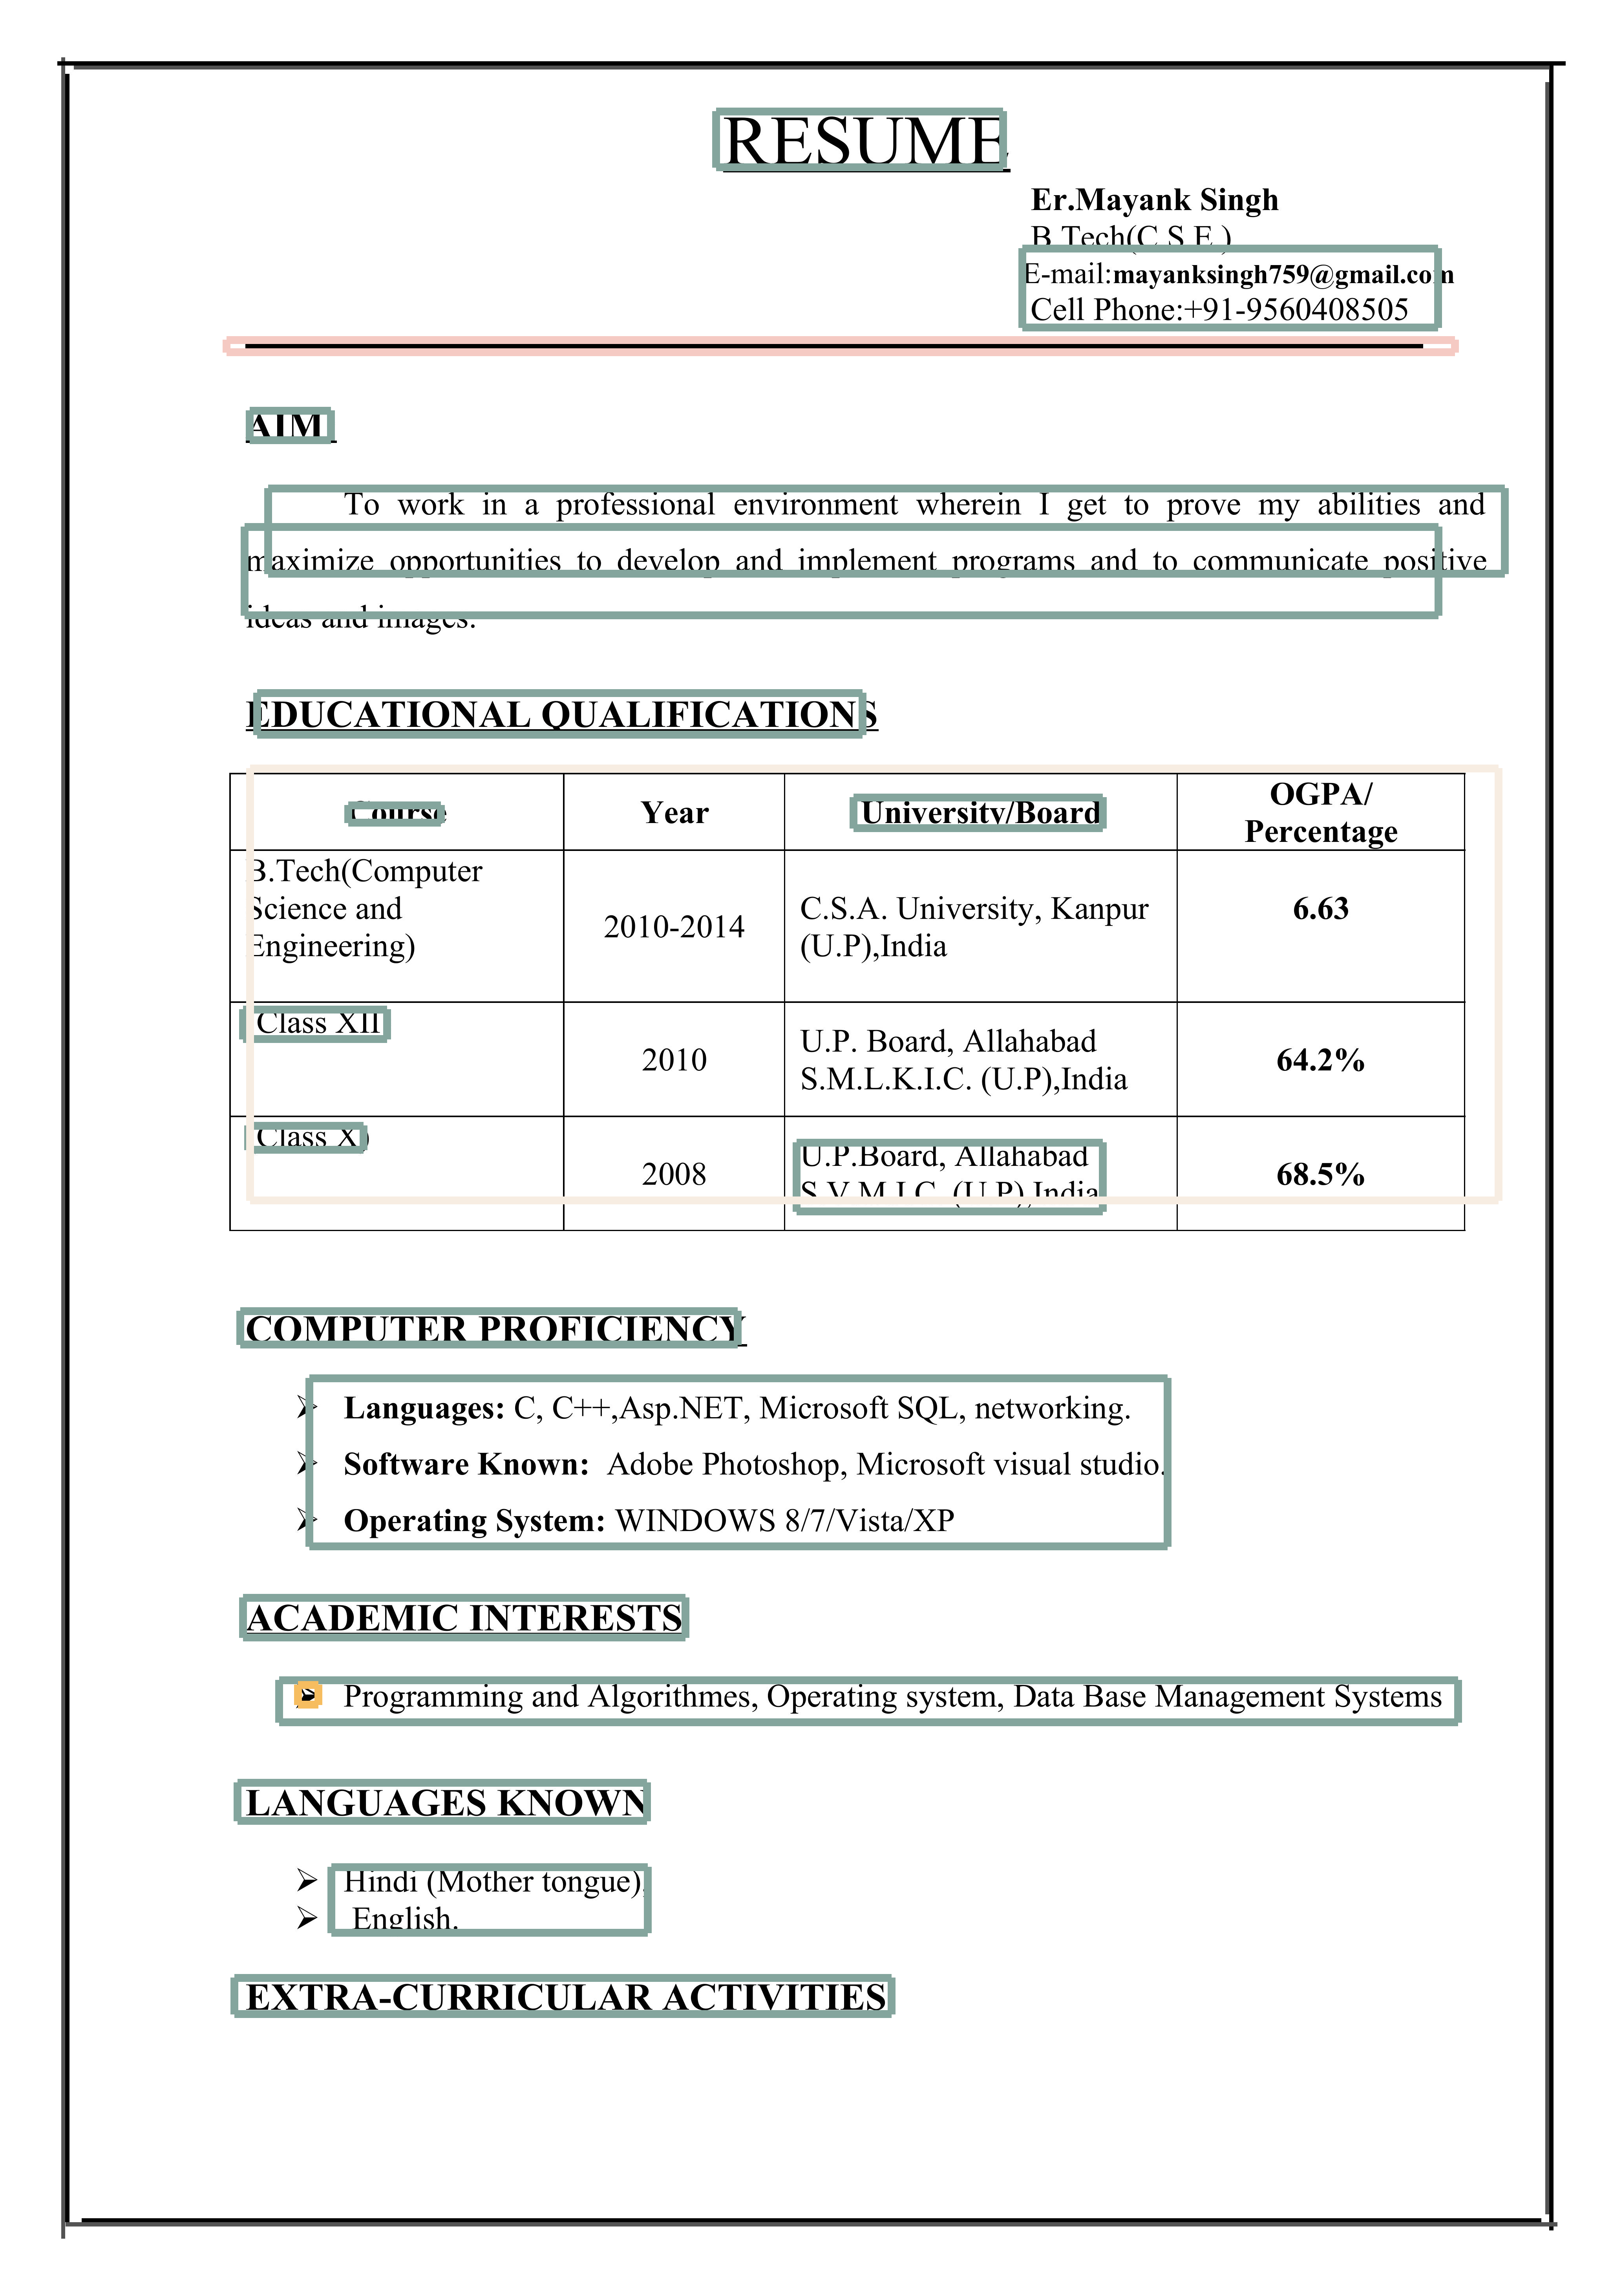

In [6]:
import layoutparser as lp

model = lp.Detectron2LayoutModel('lp://PrimaLayout/mask_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                 label_map={1:"TextRegion", 2:"ImageRegion", 3:"TableRegion", 4:"MathsRegion", 5:"SeparatorRegion", 6:"OtherRegion"})
layout = model.detect(image) # You need to load the image somewhere else, e.g., image = cv2.imread(...)
lp.draw_box(image, layout,)

In [7]:
text_blocks = lp.Layout([b for b in layout if b.type=="TextRegion"])
text_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=683.744384765625, y_1=1243.4248046875, x_2=3832.66455078125, y_2=1461.5013427734375), text=None, id=None, type=TextRegion, parent=None, next=None, score=0.9999076128005981), TextBlock(block=Rectangle(x_1=1824.5631103515625, y_1=283.1886291503906, x_2=2554.537109375, y_2=426.3751525878906), text=None, id=None, type=TextRegion, parent=None, next=None, score=0.9998611211776733), TextBlock(block=Rectangle(x_1=788.755126953125, y_1=3509.299560546875, x_2=2973.021240234375, y_2=3938.14794921875), text=None, id=None, type=TextRegion, parent=None, next=None, score=0.9998207688331604), TextBlock(block=Rectangle(x_1=711.4645385742188, y_1=4278.31982421875, x_2=3713.112060546875, y_2=4386.580078125), text=None, id=None, type=TextRegion, parent=None, next=None, score=0.9993996620178223), TextBlock(block=Rectangle(x_1=636.1734619140625, y_1=1045.2470703125, x_2=842.0537109375, y_2=1121.0286865234375), text=None, id=None, type=TextRegion, parent=None, ne

In [8]:
figure_blocks = lp.Layout([b for b in layout if b.type=='OtherRegion'])
figure_blocks

Layout(_blocks=[], page_data={})

In [9]:
text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

In [10]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1])

right_blocks = [b for b in text_blocks if b not in left_blocks]
right_blocks.sort(key = lambda b:b.coordinates[1])

# And finally combine the two list and add the index
# according to the order
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

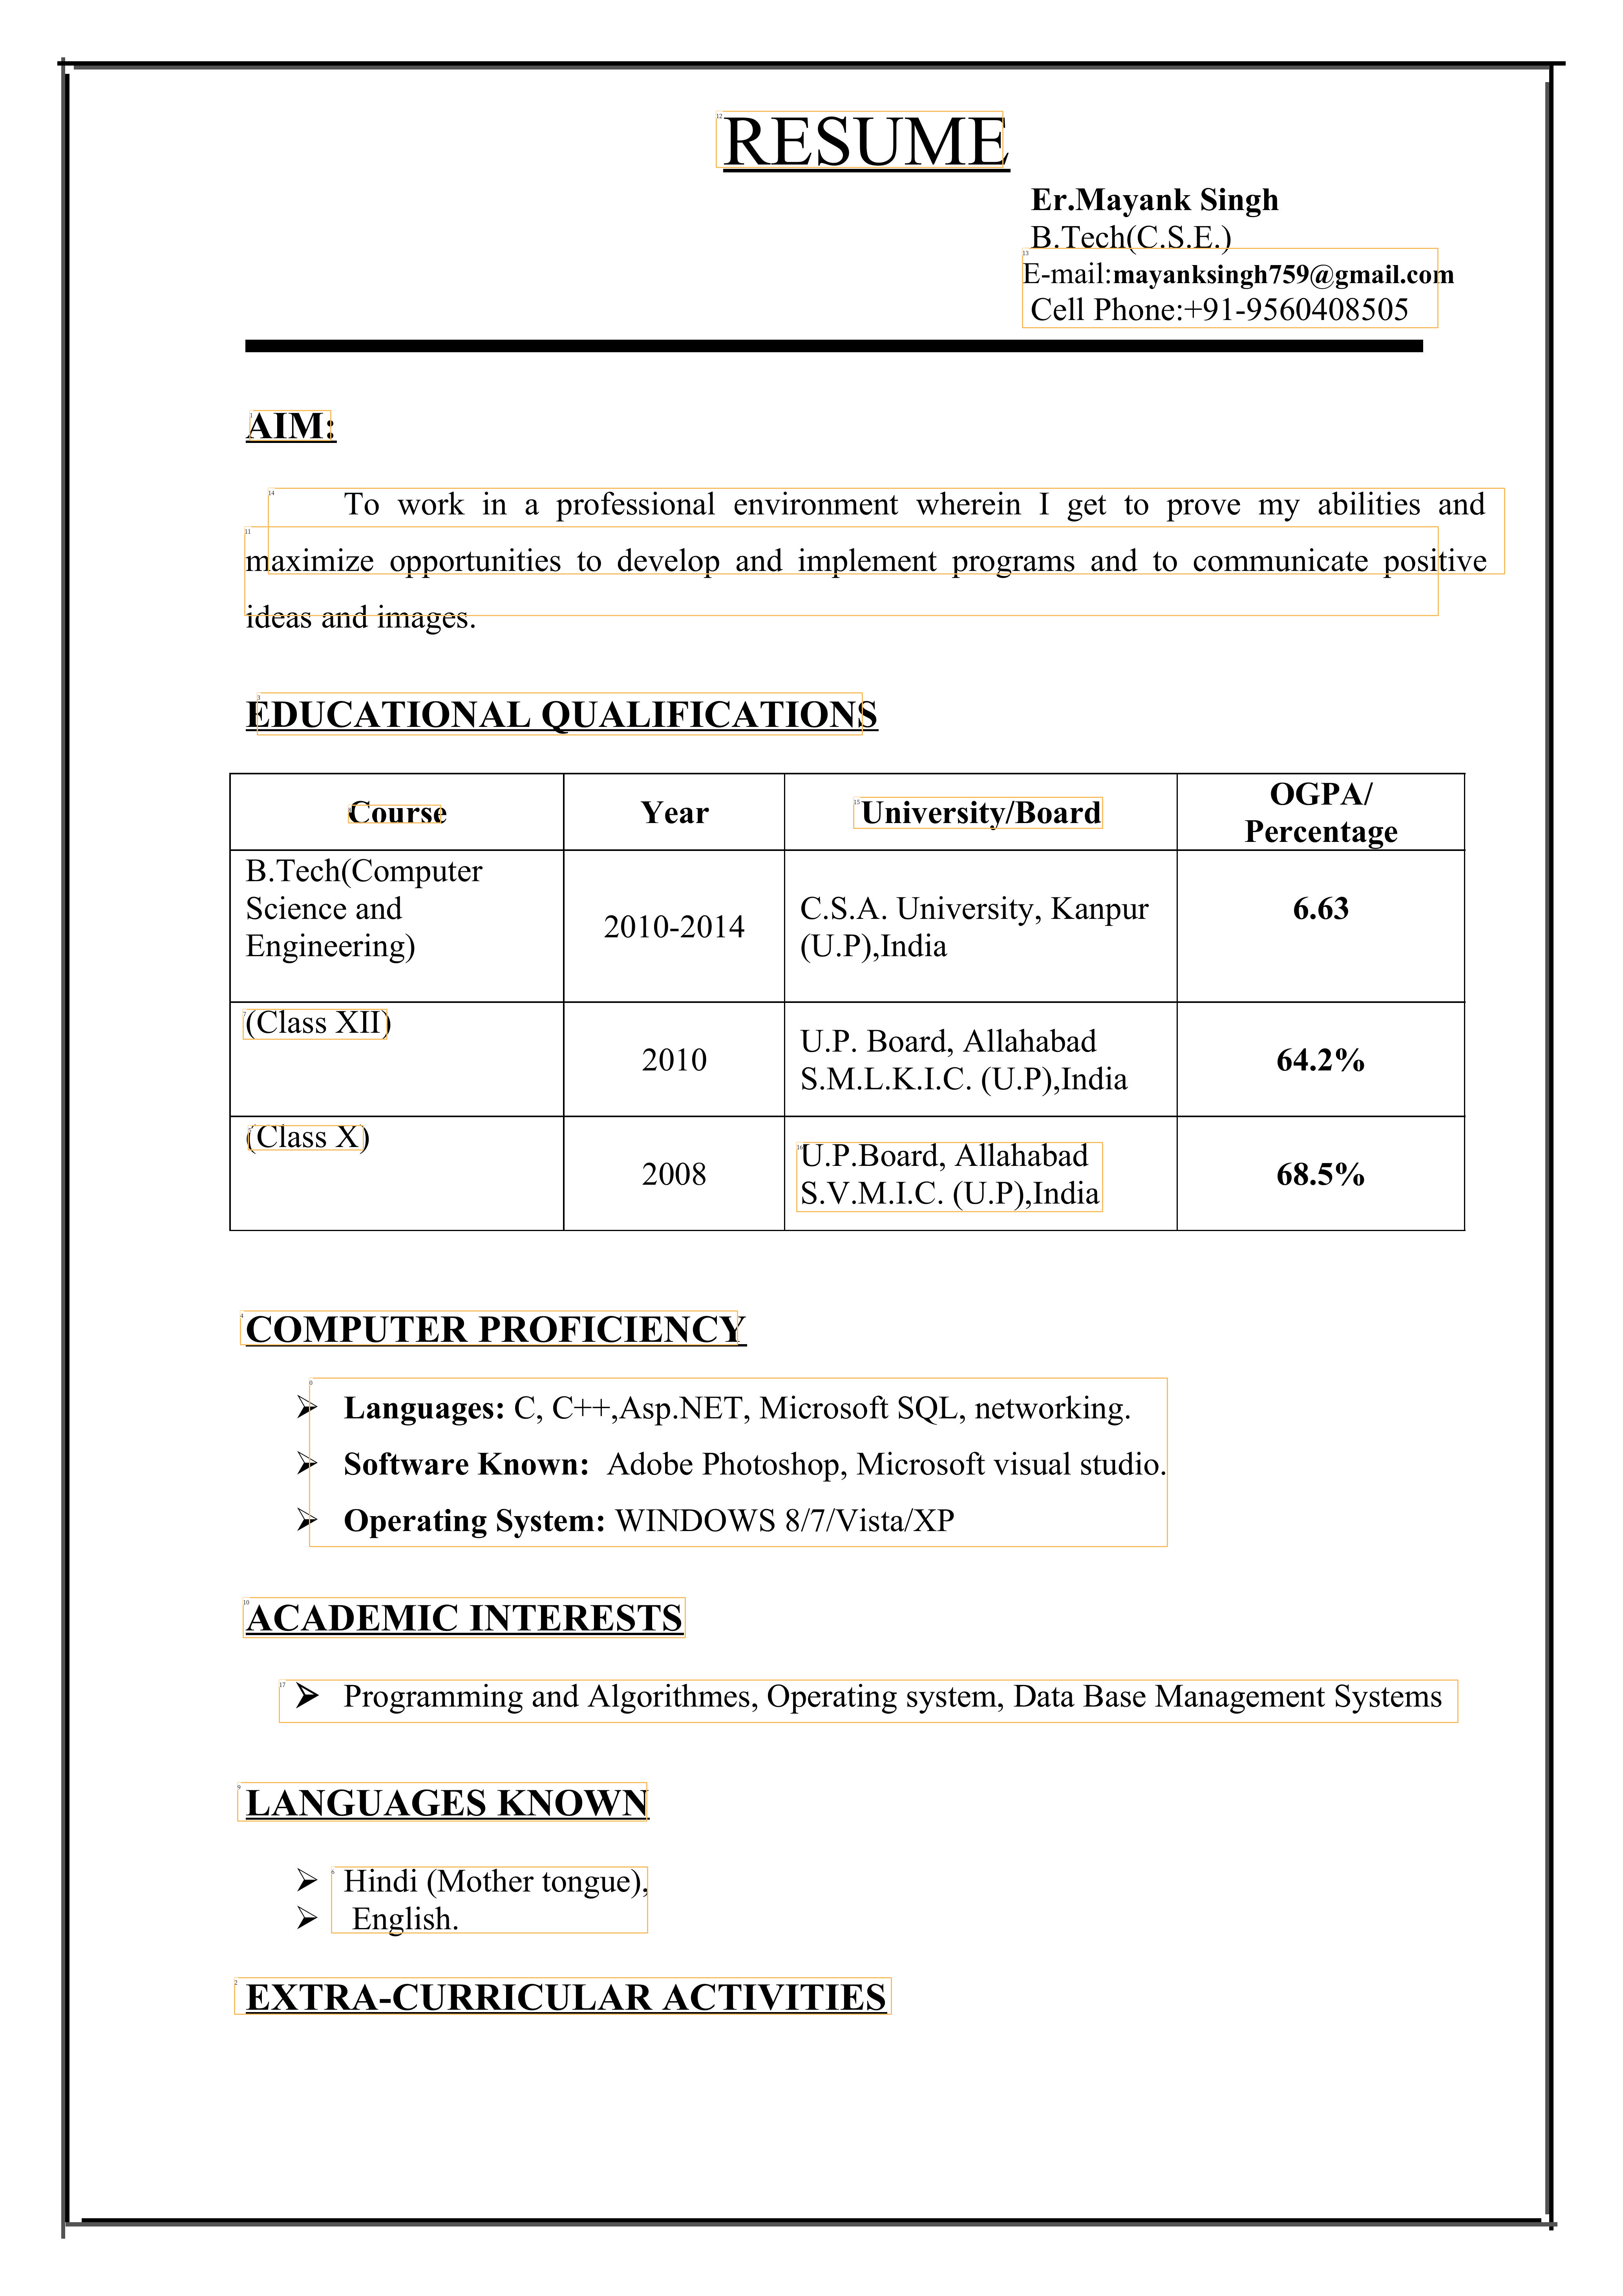

In [11]:
lp.draw_box(image, text_blocks,
            box_width=3, 
            show_element_id=True)

In [12]:
ocr_agent = lp.TesseractAgent(languages='eng') 
    # Initialize the tesseract ocr engine. You might need 
    # to install the OCR components in layoutparser:
    # pip install layoutparser[ocr]

In [13]:
for block in text_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness 
        
    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [14]:
for txt in text_blocks.get_texts():
    print(txt, end='\n---\n')

> Languages: C, C++,Asp.NET, Microsoft SQL, networking.
> Software Known: Adobe Photoshop, Microsoft visual studio.

> Operating System: WINDOWS 8/7/Vista/XP

---
AIM:

---
EXTRA-CURRICULAR ACTIVITIES

---
{DUCATIONAL QUALIFICATIONS

---

---
(Class X

---
Hindi (Mother tongue),
English.

---
(Class XID)

---

---
LANGUAGES KNOWN

---
ACADEMIC INTERESTS

---
maximize opportunities to develop and implement programs and to communicate posi

---

---
NO

E- mail: mayanksingh759@gmail. col
Cell Phone:+91-9560408505

---
To work in a professional environment wherein I get to prove my abilities and

aximize opportunities to develop and implement programs and to communicate positive

---
University/Board

---
U.P.Board, Allahabad
S.V.M.LC. (U.P),India

---
> Programming and Algorithmes, Operating system, Data Base Management Systems

---


In [15]:
text_blocks.get_texts()

['> Languages: C, C++,Asp.NET, Microsoft SQL, networking.\n> Software Known: Adobe Photoshop, Microsoft visual studio.\n\n> Operating System: WINDOWS 8/7/Vista/XP\n\x0c',
 'AIM:\n\x0c',
 'EXTRA-CURRICULAR ACTIVITIES\n\x0c',
 '{DUCATIONAL QUALIFICATIONS\n\x0c',
 '\x0c',
 '(Class X\n\x0c',
 'Hindi (Mother tongue),\nEnglish.\n\x0c',
 '(Class XID)\n\x0c',
 '\x0c',
 'LANGUAGES KNOWN\n\x0c',
 'ACADEMIC INTERESTS\n\x0c',
 'maximize opportunities to develop and implement programs and to communicate posi\n\x0c',
 '\x0c',
 'NO\n\nE- mail: mayanksingh759@gmail. col\nCell Phone:+91-9560408505\n\x0c',
 'To work in a professional environment wherein I get to prove my abilities and\n\naximize opportunities to develop and implement programs and to communicate positive\n\x0c',
 'University/Board\n\x0c',
 'U.P.Board, Allahabad\nS.V.M.LC. (U.P),India\n\x0c',
 '> Programming and Algorithmes, Operating system, Data Base Management Systems\n\x0c']

In [16]:
for block in text_blocks:
    print(block)

TextBlock(block=Rectangle(x_1=788.755126953125, y_1=3509.299560546875, x_2=2973.021240234375, y_2=3938.14794921875), text=> Languages: C, C++,Asp.NET, Microsoft SQL, networking.
> Software Known: Adobe Photoshop, Microsoft visual studio.

> Operating System: WINDOWS 8/7/Vista/XP
, id=0, type=TextRegion, parent=None, next=None, score=0.9998207688331604)
TextBlock(block=Rectangle(x_1=636.1734619140625, y_1=1045.2470703125, x_2=842.0537109375, y_2=1121.0286865234375), text=AIM:
, id=1, type=TextRegion, parent=None, next=None, score=0.9993904829025269)
TextBlock(block=Rectangle(x_1=597.101806640625, y_1=5036.203125, x_2=2270.297119140625, y_2=5129.05615234375), text=EXTRA-CURRICULAR ACTIVITIES
, id=2, type=TextRegion, parent=None, next=None, score=0.9985918402671814)
TextBlock(block=Rectangle(x_1=655.4830322265625, y_1=1764.2679443359375, x_2=2196.392822265625, y_2=1871.3502197265625), text={DUCATIONAL QUALIFICATIONS
, id=3, type=TextRegion, parent=None, next=None, score=0.998226463794

In [17]:
#!pip install spacy

#!pip install spacy-transformers
#!python -m spacy download en_core_web_trf

#!pip install spacy-transformers
#!python -m spacy download en_core_web_trf


In [18]:

import spacy
nlp = spacy.load("en_core_web_trf")

sentence=["".join(txt) for txt in text_blocks.get_texts()]

".".join(sentence)

doc = nlp(".".join(sentence))
for ent in doc.ents:
  print(ent.text,ent.label_)

/home/kguttas/anaconda3/envs/practica/lib/python3.7/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


Adobe ORG
Microsoft ORG
English LANGUAGE
Allahabad
 GPE
